# LVC Application: Understanding clustering on concentric circles

In [ ]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# creating concentric circles
from sklearn import datasets

np.random.seed(1)
conc_circles = datasets.make_circles(n_samples=2000, factor=.5, noise=.05)

In [ ]:
import warnings
warnings.filterwarnings('ignore') # to get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style='darkgrid')

In [ ]:
X,y = conc_circles

In [ ]:
df = pd.DataFrame(X)
df.columns = ['X1', 'X2']
df['Y'] = y
df

,X1,X2,Y
0,-0.55,-0.90,0
1,-0.19,-0.42,1
2,-0.13,0.54,1
3,-0.18,0.45,1
4,0.13,0.51,1
...,...,...,...
1995,0.13,-0.51,1
1996,0.49,0.33,1
1997,0.59,-0.28,1
1998,0.18,1.02,0


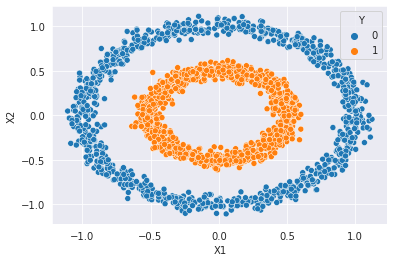

In [ ]:
# Original Plot
sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'Y')

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

## KMeans

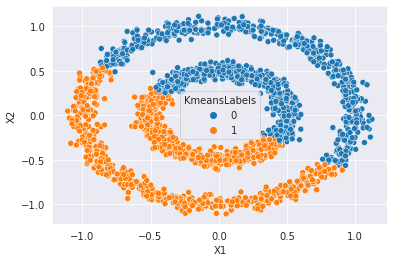

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state= 1)

kmeans.fit(X)
df['KmeansLabels'] = kmeans.predict(X)

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'KmeansLabels')

### Comments
 - The clusters are meaningful in this case.

## KMedoids


In [ ]:
# ! pip install scikit-learn-extra

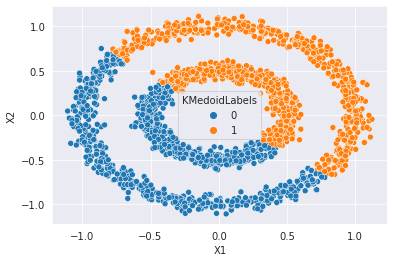

In [ ]:
from sklearn_extra.cluster import KMedoids

kmedo = KMedoids(n_clusters = 2, random_state = 12)
kmedo.fit(X)
df['KMedoidLabels'] = kmedo.predict(X)

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'KMedoidLabels')

### Comments
 - We see similar results with KMedoids

## GMM

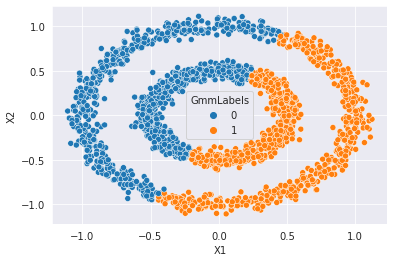

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2, random_state=12)
gmm.fit(X) 
df['GmmLabels'] = gmm.predict(X)

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'GmmLabels')

### Comments
GMM too has failed to make sense while clustering.

## Agglomerative

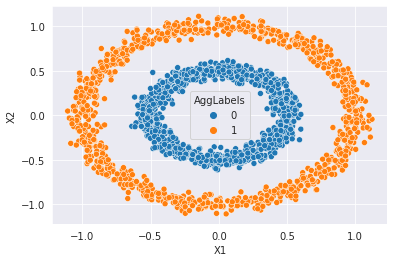

In [ ]:
from sklearn.cluster import AgglomerativeClustering

aglc = AgglomerativeClustering(n_clusters = 2, linkage = 'single')

df['AggLabels'] = aglc.fit_predict(X)

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'AggLabels')

### Comments

 - Agglomerative Clustering with default hyperparameters and 2 clusters has not been able to create the desired clusters either.

## DBSCAN

- Now let us look at the DBSCAN algorithm

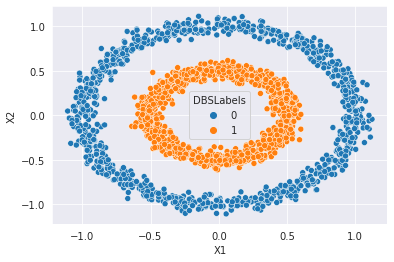

In [ ]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = 0.3)

df['DBSLabels'] = dbs.fit_predict(X)

sns.scatterplot(x = 'X1', y = 'X2', data = df, hue = 'DBSLabels')

# Comments

- Only DBSCAN has been able to correctly identify the existing clusters in the dataset. Note that based on the value of the hyper-parameter eps, the results might vary for DBSCAN too. FOr too large a value, their might be just one cluster that is identified by this algorithm(try with values 0.7,1).

## Further Recommendations

- You can visit <a href = 'https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html'>here</a> to better understand the behaviour of these algorithms on other types of toy data sets. You are recommended to try out other sample datasets used in the example above by referring this notebook.
- A snippet from the same has been added below.



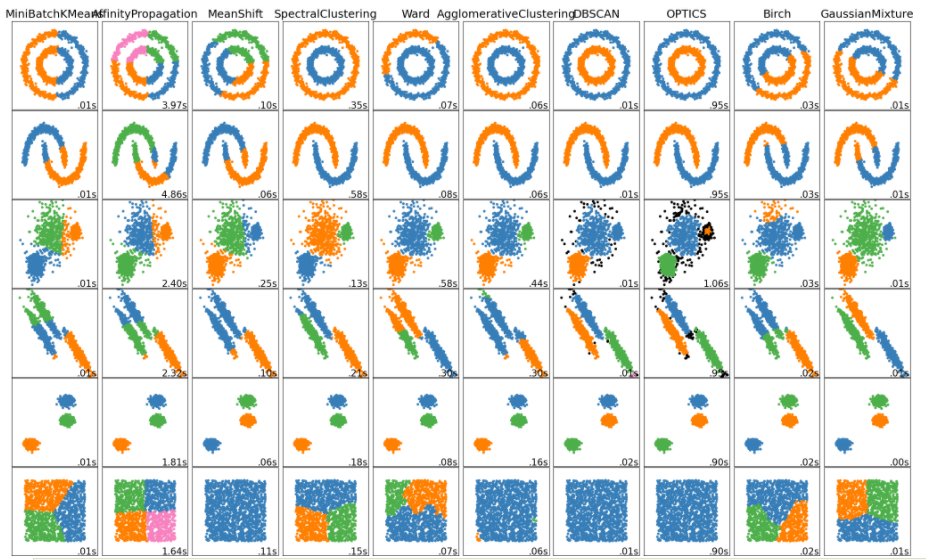
